In [112]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from shap import TreeExplainer, summary_plot, dependence_plot
from sklearn.metrics import roc_curve, roc_auc_score

In [70]:
data  = pd.read_csv(r"C:\Users\Hp Probook\Desktop\DIV DATA\div_academy_project.csv") 
# Datani oxutdururam

In [71]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [116]:
na_features = data.isna().sum()
print(na_features)
# Datadaki NA-lerini tapiram

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
Age_binned    0
dtype: int64


In [117]:
percentage_na_features = (data.isna().sum() / len(data)) * 100
# Hesablama yolu ile datanin nece faizin NA oldugunu tapiram

In [6]:
na_analysis = pd.DataFrame({
    'Missing Count': na_features,
    'Missing Percentage': percentage_na_features
})
print (na_analysis)
# Her column ucun NA faizini tapiram

           Missing Count  Missing Percentage
age                    0                 0.0
job                    0                 0.0
marital                0                 0.0
education              0                 0.0
default                0                 0.0
balance                0                 0.0
housing                0                 0.0
loan                   0                 0.0
contact                0                 0.0
day                    0                 0.0
month                  0                 0.0
duration               0                 0.0
campaign               0                 0.0
pdays                  0                 0.0
previous               0                 0.0
poutcome               0                 0.0
deposit                0                 0.0


In [74]:
data['default'] = data['default'].replace({'yes': 1, 'no': 0})
# default columndaki yes ve no lari 1 ve 0 olaraq deyisirem

In [75]:
default_rate = data.groupby('job')['default'].mean()
top_3_pese = default_rate.sort_values(ascending=False)
top_3_pese.head(3)
# default rate i her ish ucun qruplasdirib ilk 3 ish sahesini tapiram

job
entrepreneur    0.030488
housemaid       0.029197
unemployed      0.022409
Name: default, dtype: float64

In [118]:
categorical_columns = data.select_dtypes(include=['object'])
categorical_columns.head(5)
# kateqorik columnlari secim edirem

,job,marital,education,housing,loan,contact,month,poutcome,deposit,Age_binned
0,admin.,married,secondary,yes,no,cellular,may,failure,yes,old
1,admin.,married,secondary,no,no,cellular,may,failure,yes,old
2,technician,married,secondary,yes,no,cellular,may,failure,yes,middle
3,services,married,secondary,yes,no,cellular,may,failure,yes,old
4,admin.,married,tertiary,no,no,cellular,may,failure,yes,old


In [119]:
data = data.replace('unknown', np.nan)
na_count = data.isna().sum()
na_count
# unknown olanlari NA ile evez edirem ve her column uzre NA sayini tapiram

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
Age_binned    0
dtype: int64

In [78]:
data_rate_months = data.groupby('month')['default'].mean()
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
data_rate_months = data_rate_months.reindex(months)
data_rate_months
# default rateleri aylar uzre qruplasdirma edirem

month
jan    0.017442
feb    0.006443
mar    0.000000
apr    0.007584
may    0.014873
jun    0.021277
jul    0.030383
aug    0.013825
sep    0.003135
oct    0.000000
nov    0.014846
dec    0.000000
Name: default, dtype: float64

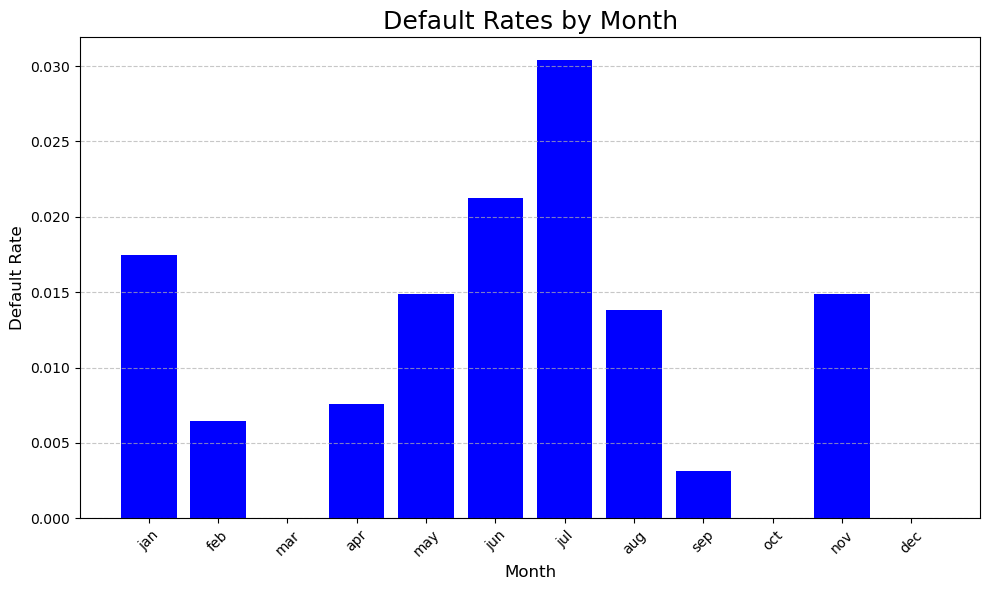

In [79]:
plt.figure(figsize=(10, 6))
plt.bar(data_rate_months.index, data_rate_months.values, color='blue')
plt.title('Default Rates by Month', fontsize=18)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Default Rate', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [80]:
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].fillna(data[column].mode()[0])
    # NA value-leri Import etdirem

In [81]:
def categorize_age(age):
    if age < 25:
        return 'young'
    elif 25 <= age < 50:
        return 'middle'
    else:
        return 'old'

data['Age_binned'] = data['age'].apply(categorize_age)
data
# Yasa gore yeni sutun yaradaraq genc orta ve qoca olaraq 3 nove bolmek

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Age_binned
0,59,admin.,married,secondary,0,2343,yes,no,cellular,5,may,1042,1,-1,0,failure,yes,old
1,56,admin.,married,secondary,0,45,no,no,cellular,5,may,1467,1,-1,0,failure,yes,old
2,41,technician,married,secondary,0,1270,yes,no,cellular,5,may,1389,1,-1,0,failure,yes,middle
3,55,services,married,secondary,0,2476,yes,no,cellular,5,may,579,1,-1,0,failure,yes,old
4,54,admin.,married,tertiary,0,184,no,no,cellular,5,may,673,2,-1,0,failure,yes,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,yes,no,cellular,20,apr,257,1,-1,0,failure,no,middle
11158,39,services,married,secondary,0,733,no,no,cellular,16,jun,83,4,-1,0,failure,no,middle
11159,32,technician,single,secondary,0,29,no,no,cellular,19,aug,156,2,-1,0,failure,no,middle
11160,43,technician,married,secondary,0,0,no,yes,cellular,8,may,9,2,172,5,failure,no,middle


In [121]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_1 = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]
# IQR hesablamasi asagi ve yuxari boundlari hesabı
# Outlair handle

In [16]:
data_1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Age_binned
0,59,admin.,married,secondary,0,2343,yes,no,cellular,5,may,1042,1,-1,0,failure,yes,old
1,56,admin.,married,secondary,0,45,no,no,cellular,5,may,1467,1,-1,0,failure,yes,old
2,41,technician,married,secondary,0,1270,yes,no,cellular,5,may,1389,1,-1,0,failure,yes,middle
3,55,services,married,secondary,0,2476,yes,no,cellular,5,may,579,1,-1,0,failure,yes,old
4,54,admin.,married,tertiary,0,184,no,no,cellular,5,may,673,2,-1,0,failure,yes,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,yes,no,cellular,20,apr,257,1,-1,0,failure,no,middle
11158,39,services,married,secondary,0,733,no,no,cellular,16,jun,83,4,-1,0,failure,no,middle
11159,32,technician,single,secondary,0,29,no,no,cellular,19,aug,156,2,-1,0,failure,no,middle
11160,43,technician,married,secondary,0,0,no,yes,cellular,8,may,9,2,172,5,failure,no,middle


In [17]:
avg_balance_default = data_1[data_1['default'] == 1]['balance'].mean()
avg_balance_nondefault = data_1[data_1['default'] == 0]['balance'].mean()
difference_balance = avg_balance_nondefault - avg_balance_default
difference_balance
# nondefault ve default ortalama balansi tapib aradaki ferqi hesabladim

1581.791652367313

C:\Users\Hp Probook\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp Probook\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


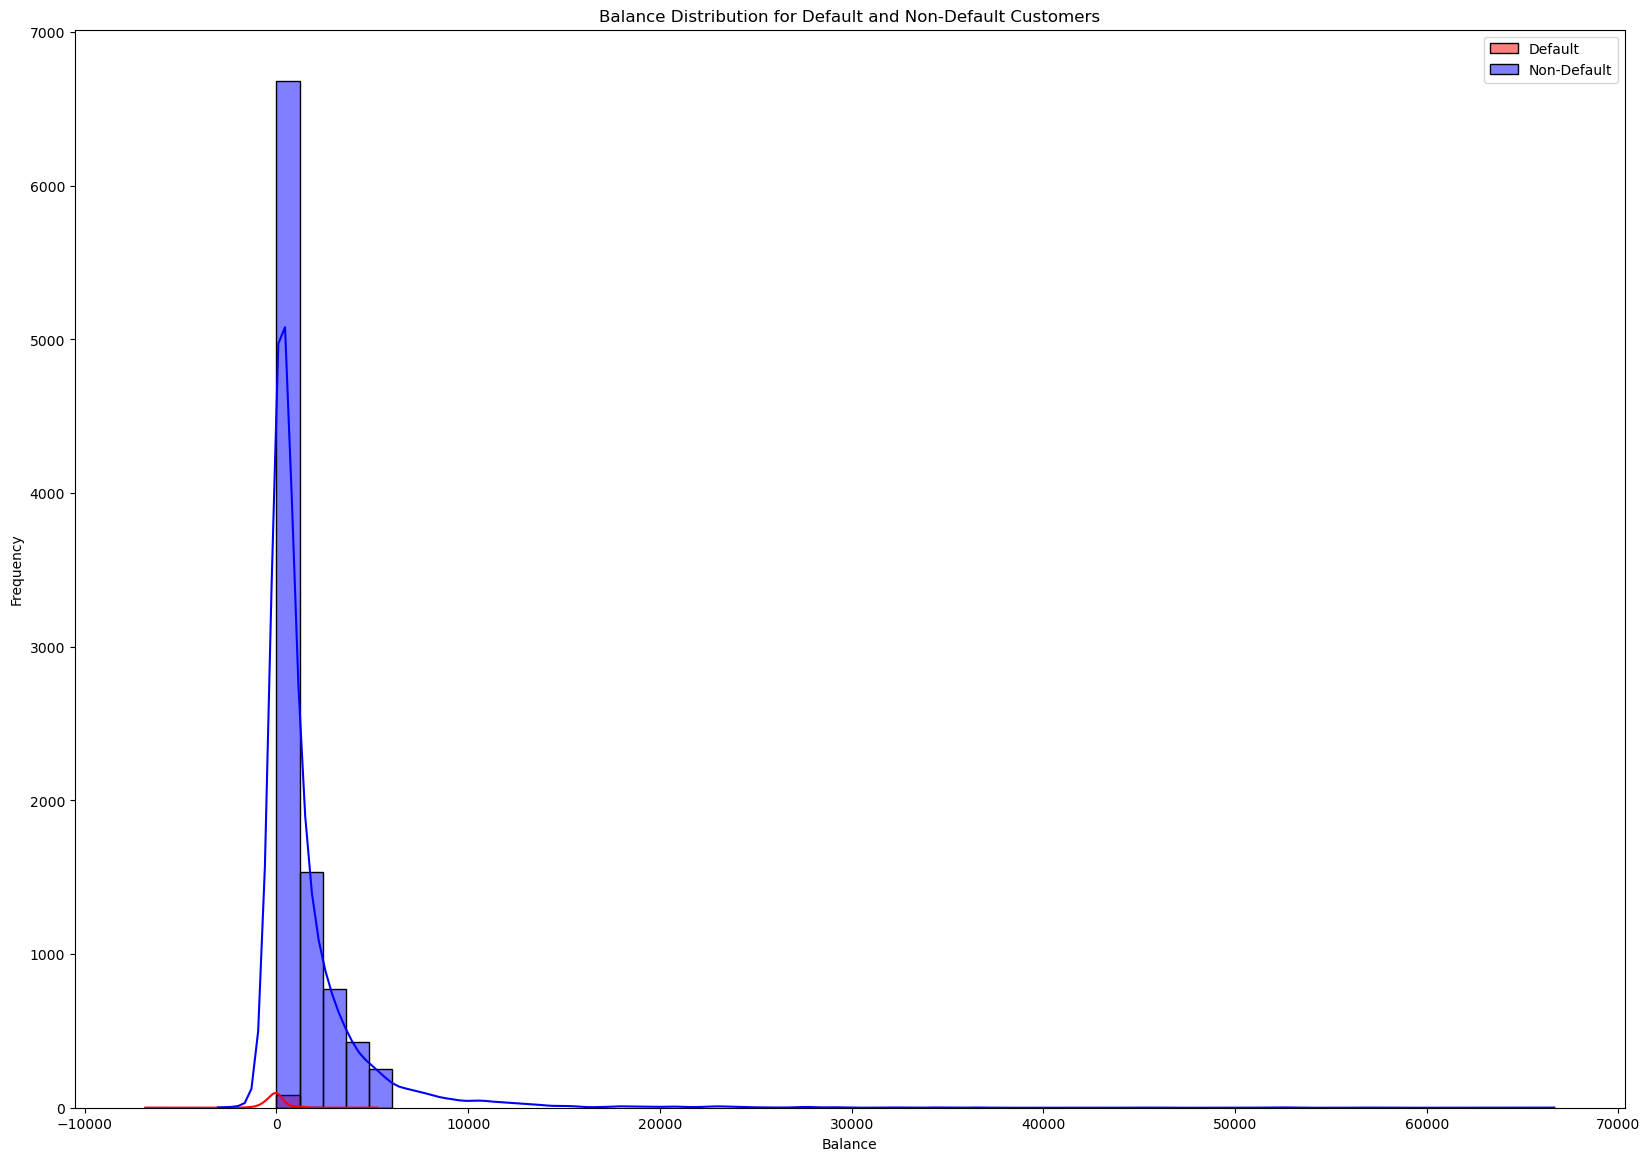

In [18]:
plt.figure(figsize=(20, 14))

sns.histplot(data_1[data_1['default'] == 1]['balance'], kde=True, color='red', label='Default', bins=5, binrange=(0,6000))

sns.histplot(data_1[data_1['default'] == 0]['balance'], kde=True, color='blue', label='Non-Default', bins=5, binrange=(0,6000))

plt.title('Balance Distribution for Default and Non-Default Customers')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [19]:
balance_job_avg = data_1.groupby('job')['balance'].mean()
top_5_pese = balance_job_avg.sort_values(ascending=False)
top_5_pese.head(5)
# işə uyğun qruplaşdırıb ortalama balansı hesablayaraq ascending ilə top 5 peşəni tap

job
retired          2066.274920
self-employed    1849.895782
management       1798.620768
entrepreneur     1626.902141
technician       1556.294569
Name: balance, dtype: float64

In [20]:
pese_5=top_5_pese.index.to_list()
pese_5 = pese_5[0:5]
pese_5

['retired', 'self-employed', 'management', 'entrepreneur', 'technician']

In [131]:
def default_rate_balance_5(job):
    balance_job_avg = data_1.groupby('job')['balance'].mean()
    default_rate = data_1.groupby('job')['default'].mean()
    balance_job_avg = data_1.groupby('job')['balance'].mean()
    if job in pese_5:  # pese_5 siyahısında olub-olmadığını yoxlayır
        print(f"Job: {job}, avg balans: {balance_job_avg[job]}, Defalt : {default_rate[job]}")
    else:
        pass
    

In [128]:
data_1['duration_in_months'] = data_1['duration'] / 30.astype(int)

C:\Users\Hp Probook\AppData\Local\Temp\ipykernel_13564\722372096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['duration_in_months'] = data_1['duration']/30


In [88]:
data_1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Age_binned,duration_in_months
0,59,admin.,married,secondary,0,2343,yes,no,cellular,5,may,1042,1,-1,0,failure,yes,old,34.733333
1,56,admin.,married,secondary,0,45,no,no,cellular,5,may,1467,1,-1,0,failure,yes,old,48.900000
2,41,technician,married,secondary,0,1270,yes,no,cellular,5,may,1389,1,-1,0,failure,yes,middle,46.300000
3,55,services,married,secondary,0,2476,yes,no,cellular,5,may,579,1,-1,0,failure,yes,old,19.300000
4,54,admin.,married,tertiary,0,184,no,no,cellular,5,may,673,2,-1,0,failure,yes,old,22.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,yes,no,cellular,20,apr,257,1,-1,0,failure,no,middle,8.566667
11158,39,services,married,secondary,0,733,no,no,cellular,16,jun,83,4,-1,0,failure,no,middle,2.766667
11159,32,technician,single,secondary,0,29,no,no,cellular,19,aug,156,2,-1,0,failure,no,middle,5.200000
11160,43,technician,married,secondary,0,0,no,yes,cellular,8,may,9,2,172,5,failure,no,middle,0.300000


In [24]:
data_1 = data_1.copy() 
data_1.rename(columns={'default': 'target'}, inplace= True)

In [25]:
data_1['duration_in_months'] = data_1['duration'] / 30

In [26]:
education_deposit_ratio = data_1.groupby('education')['deposit'].value_counts(normalize=True).unstack()
print(education_deposit_ratio)

deposit          no       yes
education                    
primary    0.629682  0.370318
secondary  0.550889  0.449111
tertiary   0.460365  0.539635


In [27]:
data_1['job_education'] = data_1['job'] + ' - ' + data_1['education']

In [28]:
######### Data Science Part ########

# data

In [29]:
x = data_1.drop('target', axis=1)
y = data_1['target']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", len(x_train))
print("Test size:", len(x_test))

Train size: 8792
Test size: 2199


In [31]:
data_1

,age,job,marital,education,target,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Age_binned,duration_in_months,job_education
0,59,admin.,married,secondary,0,2343,yes,no,cellular,5,may,1042,1,-1,0,failure,yes,old,34.733333,admin. - secondary
1,56,admin.,married,secondary,0,45,no,no,cellular,5,may,1467,1,-1,0,failure,yes,old,48.900000,admin. - secondary
2,41,technician,married,secondary,0,1270,yes,no,cellular,5,may,1389,1,-1,0,failure,yes,middle,46.300000,technician - secondary
3,55,services,married,secondary,0,2476,yes,no,cellular,5,may,579,1,-1,0,failure,yes,old,19.300000,services - secondary
4,54,admin.,married,tertiary,0,184,no,no,cellular,5,may,673,2,-1,0,failure,yes,old,22.433333,admin. - tertiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,yes,no,cellular,20,apr,257,1,-1,0,failure,no,middle,8.566667,blue-collar - primary
11158,39,services,married,secondary,0,733,no,no,cellular,16,jun,83,4,-1,0,failure,no,middle,2.766667,services - secondary
11159,32,technician,single,secondary,0,29,no,no,cellular,19,aug,156,2,-1,0,failure,no,middle,5.200000,technician - secondary
11160,43,technician,married,secondary,0,0,no,yes,cellular,8,may,9,2,172,5,failure,no,middle,0.300000,technician - secondary


In [33]:
print(data_1.isnull().sum())

age                   0
job                   0
marital               0
education             0
target                0
balance               0
housing               0
loan                  0
contact               0
day                   0
month                 0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
deposit               0
Age_binned            0
duration_in_months    0
job_education         0
dtype: int64


In [95]:
label_encoders = {}
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 
                        'contact', 'month', 'poutcome', 'deposit', 'Age_binned', 'job_education']

for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    x_train[col] = label_encoders[col].fit_transform(x_train[col].astype("str"))
    x_test[col] = label_encoders[col].transform(x_test[col].astype("str"))

In [96]:
print(type(x_train))
print(type(x_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [97]:
model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=50)
model.fit(x_train, y_train, cat_features=categorical_features)

0:	learn: 0.4999258	total: 45.6ms	remaining: 22.7s
50:	learn: 0.0561015	total: 1.91s	remaining: 16.8s
100:	learn: 0.0480636	total: 3.65s	remaining: 14.4s
150:	learn: 0.0423882	total: 5.42s	remaining: 12.5s
200:	learn: 0.0376167	total: 7.35s	remaining: 10.9s
250:	learn: 0.0327053	total: 9.19s	remaining: 9.12s
300:	learn: 0.0284153	total: 10.8s	remaining: 7.14s
350:	learn: 0.0239025	total: 12.6s	remaining: 5.36s
400:	learn: 0.0211802	total: 14.1s	remaining: 3.49s
450:	learn: 0.0186851	total: 15.7s	remaining: 1.7s
499:	learn: 0.0167493	total: 17.2s	remaining: 0us


In [98]:
y_pred = model.predict(x_test)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred))

CatBoost Accuracy: 0.9836289222373806


In [99]:
x_encoded = pd.get_dummies(data_1, drop_first=True)

In [100]:
x_train_enc, x_test_enc, y_train_enc, y_test_enc = train_test_split(
    x_encoded.drop('target', axis=1), y, test_size=0.2, random_state=42, stratify=y
)

KeyError: "['target'] not found in axis"

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_enc)
x_test_scaled = scaler.transform(x_test_enc)

In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train_scaled, y_train_enc)

In [41]:
y_pred_log = log_model.predict(x_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test_enc, y_pred_log))
print(classification_report(y_test_enc, y_pred_log))

Logistic Regression Accuracy: 0.9845384265575261
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2165
           1       0.00      0.00      0.00        34

    accuracy                           0.98      2199
   macro avg       0.49      0.50      0.50      2199
weighted avg       0.97      0.98      0.98      2199



C:\Users\Hp Probook\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp Probook\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp Probook\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
# Decision tree modeli
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)
dt_predictions = decision_tree.predict(x_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Dəqiqliyi: {dt_accuracy}")

Decision Tree Dəqiqliyi: 0.967712596634834


In [103]:
# random forest modeli
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)
rf_predictions = random_forest.predict(x_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Dəqiqliyi: {rf_accuracy}")

Random Forest Dəqiqliyi: 0.9845384265575261


In [104]:
# Xgboost modeli
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgboost.fit(x_train, y_train)
xgb_predictions = xgboost.predict(x_test)

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Dəqiqliyi: {xgb_accuracy}")

XGBoost Dəqiqliyi: 0.9840836743974534


C:\Users\Hp Probook\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:46:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [105]:
# ROC əyrisi üçün fpr (False Positive Rate), tpr (True Positive Rate) və thresholds hesablanır
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
optimal_idx = np.argmax(tpr - fpr)  # Ən optimal nöqtəni tapırıq
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.2f}")

Optimal Threshold: 0.01


In [ ]:
# 1. Model, proqnozlaşdırılan "target" dəyişənini (məsələn, müştərinin məhsulu alıb-almamasını) müəyyən edir.
# 2. Performans ölçüsü olaraq "accuracy", "precision", "recall", "F1-score", və AUC (area under ROC curve) istifadə edilir.
# 3. AUC dəyəri 0.9 və daha yüksəkdirsə, model çox yaxşıdır. 0.7–0.9 aralığında isə qənaətbəxşdir.
# 4. "Modelimiz, müştəri davranışlarını proqnozlaşdırmaq üçün güclü bir vasitədir və yüksək dəqiqliklə düzgün nəticələr verir."

In [106]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]):.2f}")

Confusion Matrix:
[[2163    2]
 [  34    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2165
           1       0.00      0.00      0.00        34

    accuracy                           0.98      2199
   macro avg       0.49      0.50      0.50      2199
weighted avg       0.97      0.98      0.98      2199

ROC AUC Score: 0.83


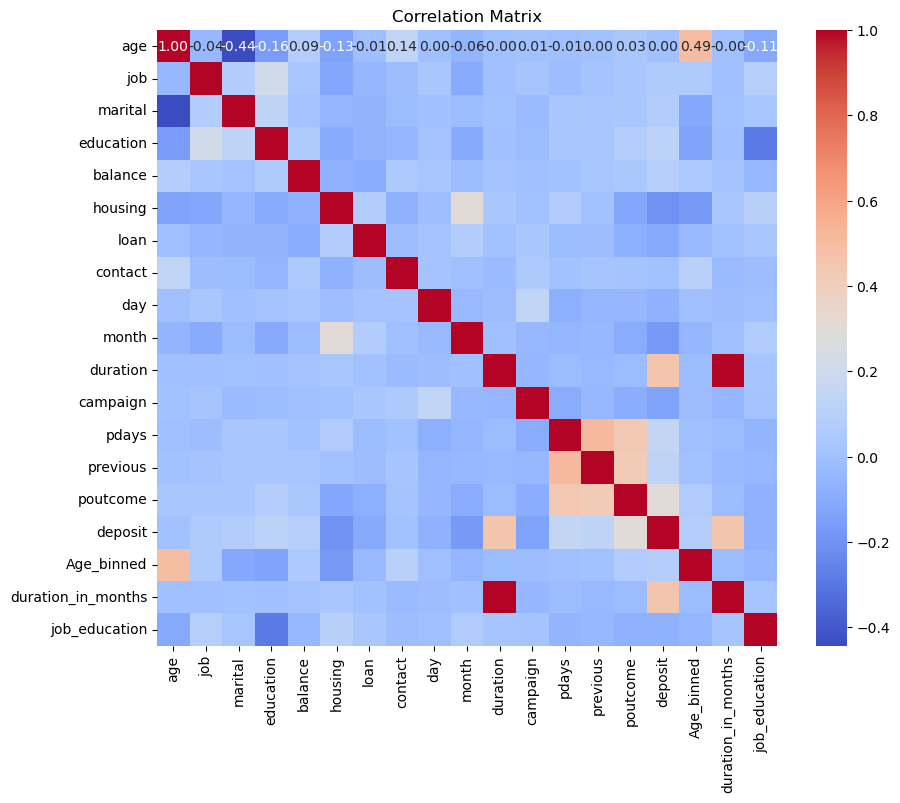

Strongly Correlated Features:
 Empty DataFrame
Columns: [age, job, marital, education, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, deposit, Age_binned, duration_in_months, job_education]
Index: []


In [107]:
# Numeric feature-lər üçün correlation matris
correlation_matrix = x_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Güclü korrelyasiyalı feature-ları seçmək
strong_corr_features = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix < 1.0)]
print("Strongly Correlated Features:\n", strong_corr_features.dropna())

In [109]:
# Xüsusiyyətlərin əhəmiyyətini əldə etmək
feature_importances = model.get_feature_importance(prettified=True)

# Əhəmiyyətləri DataFrame şəklində saxlamaq
feature_importance_df = pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": model.get_feature_importance()
}).sort_values(by="Importance", ascending=False)

# Əhəmiyyətləri çap etmək
print(feature_importance_df)


               Feature  Importance
4              balance   19.088646
1                  job   12.595750
8                  day   11.031576
0                  age   10.214794
10            duration    6.223793
17  duration_in_months    6.115578
11            campaign    5.390879
3            education    4.889658
9                month    4.242136
2              marital    3.672770
14            poutcome    3.130044
6                 loan    3.125823
13            previous    2.507041
15             deposit    2.093699
18       job_education    1.523660
16          Age_binned    1.499838
5              housing    1.487173
12               pdays    0.841000
7              contact    0.326141


               Feature  Importance
4              balance   19.088646
1                  job   12.595750
8                  day   11.031576
0                  age   10.214794
10            duration    6.223793
17  duration_in_months    6.115578
11            campaign    5.390879
3            education    4.889658
9                month    4.242136
2              marital    3.672770
14            poutcome    3.130044
6                 loan    3.125823
13            previous    2.507041
15             deposit    2.093699
18       job_education    1.523660
16          Age_binned    1.499838
5              housing    1.487173
12               pdays    0.841000
7              contact    0.326141


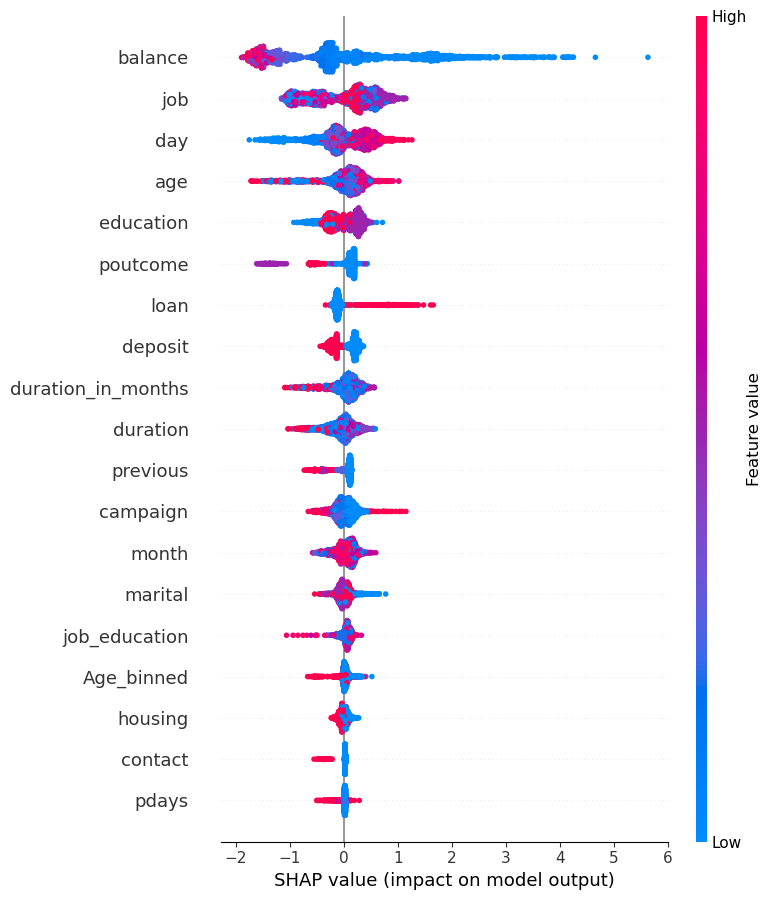

In [110]:
# Feature Importance
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)

# SHAP values
explainer = TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
summary_plot(shap_values, x_test)

In [114]:
# Kateqorik sütunların siyahısını müəyyənləşdirin
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 
                        'contact', 'month', 'poutcome', 'deposit', 'Age_binned', 'job_education']

# CatBoostClassifier modelini qurun
model = CatBoostClassifier(cat_features=categorical_features, verbose=0)

# Məlumatları təlim üçün hazırlayın
train_pool = Pool(data=x_train, label=y_train, cat_features=categorical_features)

# Modeli təlim edin
model.fit(train_pool)

# Xüsusiyyətlərin əhəmiyyətini əldə edin
feature_importances = model.get_feature_importance(prettified=True)

# Əhəmiyyətləri DataFrame şəklində saxlamaq
feature_importance_df = pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": model.get_feature_importance(Pool(data=x_train, label=y_train, cat_features=categorical_features))
}).sort_values(by="Importance", ascending=False)

# Əhəmiyyətləri çap edin
print(feature_importance_df)

               Feature  Importance
4              balance   25.167843
1                  job   12.428661
0                  age    9.518074
8                  day    6.856946
10            duration    5.948589
17  duration_in_months    5.724769
9                month    4.219818
6                 loan    4.177094
15             deposit    3.494084
3            education    3.374756
2              marital    3.279038
14            poutcome    3.180949
11            campaign    2.917514
13            previous    2.446188
12               pdays    2.430038
18       job_education    2.161870
5              housing    1.528738
16          Age_binned    0.969762
7              contact    0.175270


In [ ]:
# Yeni Feature-lər Təklifi
# Müştərinin yaşı və gəlir səviyyəsi binned şəkildə əlavə edilə bilər.
# Mövsümi dəyişikliklər (quarter və ya holiday effect).
# Müştərinin alış tarixi (əvvəlki alış sayı, vaxt intervalları).

In [115]:
def calculate_psi(train_data, test_data, bins=10):
    train_bins = pd.cut(train_data, bins=bins, duplicates='drop')
    test_bins = pd.cut(test_data, bins=train_bins.categories)
    
    train_dist = train_bins.value_counts(normalize=True)
    test_dist = test_bins.value_counts(normalize=True)
    
    psi = np.sum((train_dist - test_dist) * np.log(train_dist / test_dist))
    return psi

# Feature-lər üzrə PSI
for col in x_train.columns:
    psi = calculate_psi(x_train[col], x_test[col])
    print(f"PSI for {col}: {psi:.4f}")


AttributeError: 'Series' object has no attribute 'categories'